Data/dssLetters/test/
    ['Alef', 'Ayin', 'Bet', 'Dalet', 'Gimel', 'He', 'Het', 'Kaf', 'Kaf-final', 'Lamed', 'Mem', 'Mem-medial', 'Nun-final', 'Nun-medial', 'Pe', 'Pe-final', 'Qof', 'Resh', 'Samekh', 'Shin', 'Taw', 'Tet', 'Tsadi-final', 'Tsadi-medial', 'Waw', 'Yod', 'Zayin']
    accuracy                           0.95       922
              precision    recall  f1-score   support 
   macro avg       0.94      0.91      0.92       922
weighted avg       0.95      0.95      0.95       922



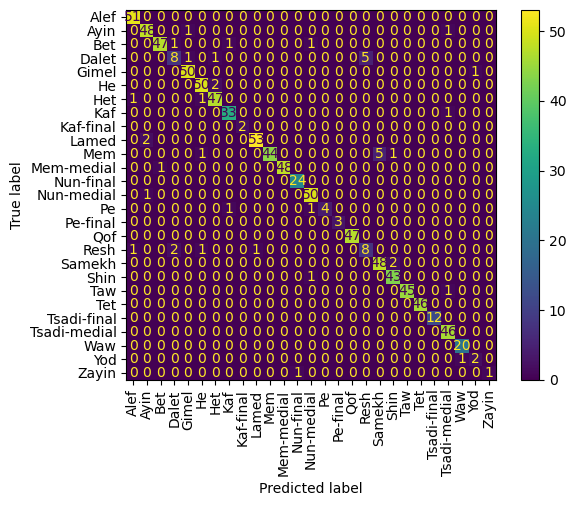

In [12]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch

from data_management.loadDSSCharacters import dssLettersDataset
from classification_models.CNN_models import CharacterCNN, LeNet5, DanNet1

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay



test_dir = 'Data/dssLetters/test/'

test_set = dssLettersDataset(folder_path= test_dir)
characterClasses = test_set.characterClasses # a list of all the class names

BATCH_SIZE = 32


test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, num_workers=1)


# calculate steps per epoch for training and validation set
testSetlength = len(test_loader.dataset)
testBatchesSteps = len(test_loader.dataset) // BATCH_SIZE



# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LeNet5()#.to(device)\

#criterion = nn.CrossEntropyLoss()
PATH = "classification_models/model_L5.pth"
#checkpoint = torch.load(path_to_model)
model.load_state_dict(torch.load(PATH, map_location=device))  # map_location makes it possible to load the model trained on a gpu, onto a cpu (for eval)
model.to(device)


def evaluate_model(model, testDataLoader, device, classes):

    ground_truths = []
    predictions = []
    model.eval()

    with torch.no_grad():
        for data in testDataLoader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images) #file_name
            preds = torch.argmax(outputs, dim=1)

            #print(preds)

            [ground_truths.append(label.item()) for label in labels]
            [predictions.append(pred.item()) for pred in preds]
            #print(preds)              
        CM=confusion_matrix(ground_truths, predictions, labels=np.arange(27))

        # this prints the precision, recall and f1-score for each class, and averaged over all classes
        #print(classification_report(ground_truths, predictions, target_names=classes))
          
    return CM


# evaluate the model on the testing set (same set as the validation set)
CM = evaluate_model(model,test_loader,device, classes=characterClasses)

      
print('    accuracy                           0.95       922\n              precision    recall  f1-score   support \n   macro avg       0.94      0.91      0.92       922\nweighted avg       0.95      0.95      0.95       922\n')
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=test_set.characterClasses)
disp.plot()

plt.xticks(rotation=90)
plt.show()
